<a href="https://colab.research.google.com/github/victorsmoreschi/Data-Studies/blob/main/Guided_Project_Exploring_Financial_Data_using_Nasdaq_Data_Link_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice with Nasdaq Data Link API

Brief API description: The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1) provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the MER/F1 data table, which contains detailed financial information such as balance sheets, cash flow statements, and income statements.

**Goal**: To perform a detailed analysis of this financial data, including trend analysis and comparative studies. We will use Python for data retrieval, cleaning, and analysis and create visualizations to present our findings effectively.

**IMPORTANT:** [The Nasdaq Data Link API requires an API key for access](https://data.nasdaq.com/sign-up). If you have already created an account on NASDAQ Data Link, you should have received your API key.

## Getting API Key

In [ ]:
# Path to nasdaq_config.py
file_path = '/content/drive/MyDrive/Colab Notebooks/nasdaq_config.py'

# Read the file to get the API_KEY
with open(file_path, 'r') as f:
    exec(f.read())  # This will define API_KEY in the current environment

# Print to verify
print(API_KEY)



N8_Ru6xzTssWnss6ZQtz


## Key infos about Nasdaq API



Base URL Structure:

Access `MER/F1` table in JSON format: `https://data.nasdaq.com/api/v3/datatables/MER/F1.json`.

Optional Query Parameters:

Limit rows per request: `qopts.per_page=10`.
Filter by `ticker` column value `SPY`: `ticker=SPY`.
Specify columns in the response: `qopts.columns=ticker, date, shares_outstanding`.
Filter rows by multiple `ticker` values: `ticker=SPY, IWM, GLD`.



In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_url = f"https://data.nasdaq.com/api/v3/datatables/MER/F1.json?api_key={API_KEY}"

parameters = {"qopts.per_page": 10000}

response = requests.get(api_url, params=parameters)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

In [18]:
# Extract column names from the 'name' key within each dictionary in the columns list
column_names = [col['name'] for col in data['datatable']['columns']]

# Create the DataFrame using the extracted column names
df_metric = pd.DataFrame(data['datatable']['data'], columns=column_names)

In [19]:
df_metric.head(2)

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


## Analysis

* To analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly banks.
* To examine how different regions contribute to these financial metrics.

In [20]:
# Defining key columns
print(df_metric.columns)

Index(['compnumber', 'reportid', 'mapcode', 'amount', 'reportdate',
       'reporttype', 'auditorstatus', 'currency', 'consolidated', 'longname',
       'shortname', 'status', 'countrycode', 'region', 'cik', 'mic', 'ticker',
       'exchange', 'address1', 'address2', 'address3', 'address4', 'city',
       'statecode', 'country', 'zipcode', 'phonenumber', 'faxnumber',
       'website', 'fye', 'indicator', 'statement'],
      dtype='object')


In [21]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [26]:
choosen_columns = ['amount','reportdate','reporttype',
                       'longname','country','indicator','statement' ]
filtered_df = df_metric[choosen_columns]

In [27]:
filtered_df.head(2)

,amount,reportdate,reporttype,longname,country,indicator,statement
0,10.481948,2011-06-30,Q2,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Derived
1,8.161754,2011-09-30,Q3,Deutsche Bank AG,DEU,Accrued Expenses Turnover,Derived


**Why those columns were choosen:**

* amount = the value of the indicador analysed
* reportdate = Perform analysis based on time-series
* reporttype = Segregate by quarter
* longname = company name
* country = perform analysis based on location
* indicador = What we are analysing
* statement = To know where the information comes from

### Initially, the analysis will be performed in the indicator **Accrued Expenses Turnover**.

**Accrued Expenses Turnover** is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

**Cash Flow Management**: It indicates how well a company is managing its cash flow in relation to its short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.

**Operational Efficiency**: This metric can reflect a company's operational efficiency, showing how promptly it settles its short-term debts.

**Financial Health Indicator**: Regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

In [28]:
aet_df = filtered_df[filtered_df['indicator'] == 'Accrued Expenses Turnover']

In [29]:
aet_df['amount'].describe()

,amount
count,139.000000
mean,26.908762
std,33.097291
min,4.689773
25%,9.675670
50%,13.753753
75%,31.777614
max,229.810427


In [32]:
aet_df.columns = aet_df.columns.str.lower().str.replace(' ','_').str.replace('longname', 'companyname')

In [34]:
aet_df['country'].value_counts()

,count
country,
USA,31
JPN,27
CYM,27
IRL,25
BHS,19
DEU,6
GBR,4


In [37]:
# Convert 'reportdate' to datetime and filter for 2010-2015
aet_df['reportdate'] = pd.to_datetime(aet_df['reportdate'])
aet_df = aet_df[(aet_df['reportdate'].dt.year >= 2010) & (aet_df['reportdate'].dt.year <= 2015)].copy()

In [41]:
relevant_data = ['companyname','reportdate','amount','country']
aet_df_2 = aet_df[relevant_data]
aet_df_2.head(2)

,companyname,reportdate,amount,country
0,Deutsche Bank AG,2011-06-30,10.481948,DEU
1,Deutsche Bank AG,2011-09-30,8.161754,DEU


#### Analysis for Each Company

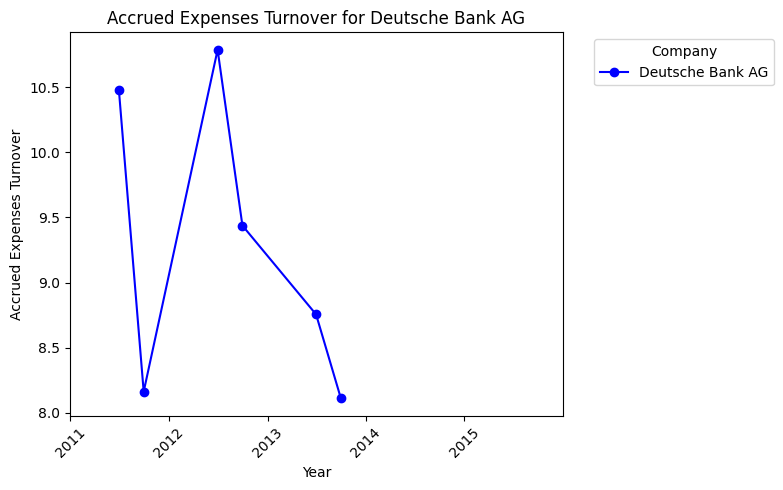

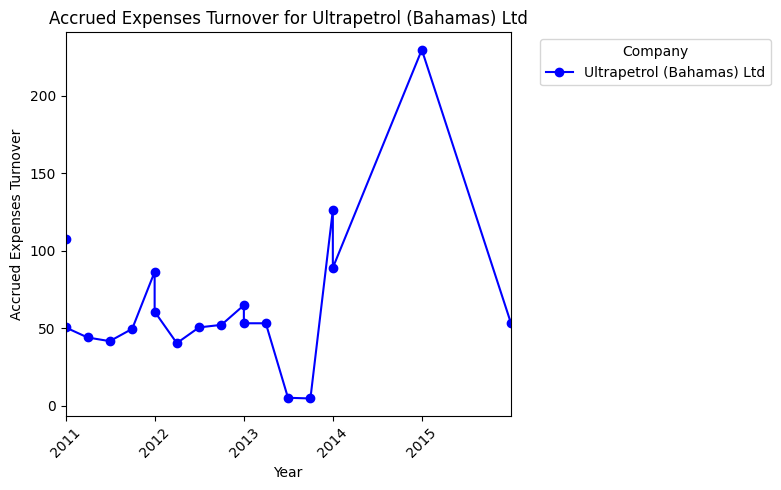

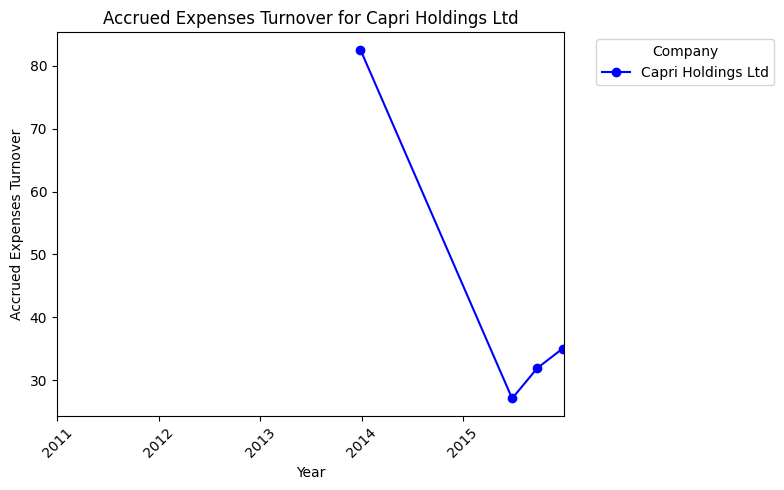

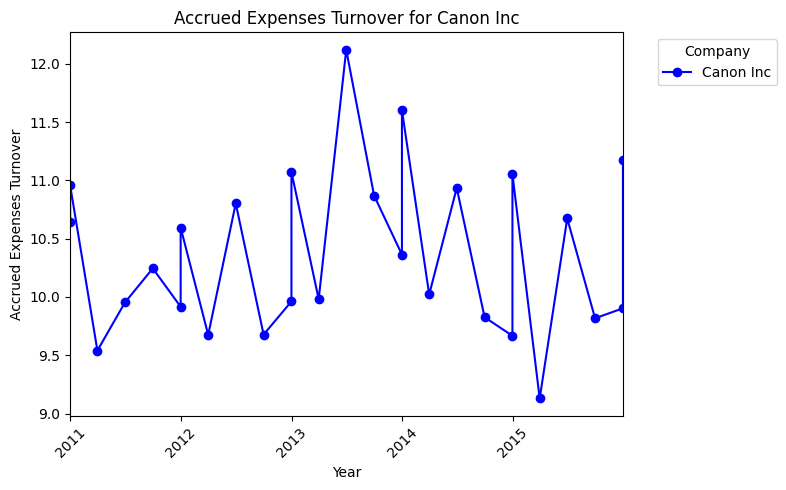

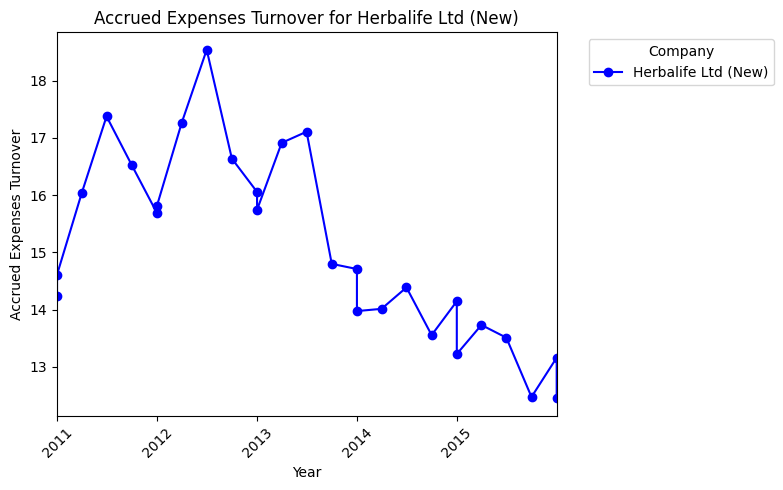

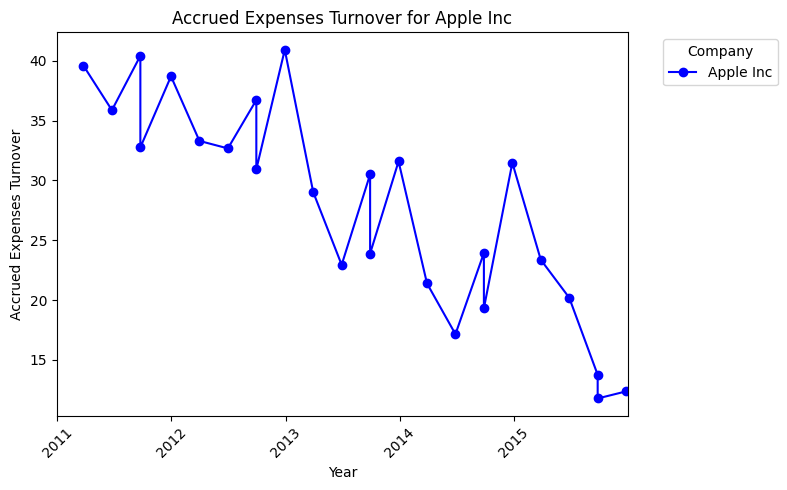

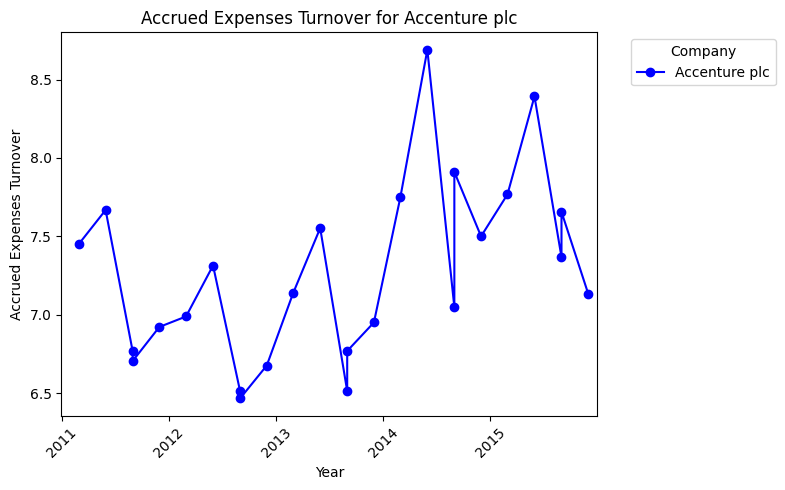

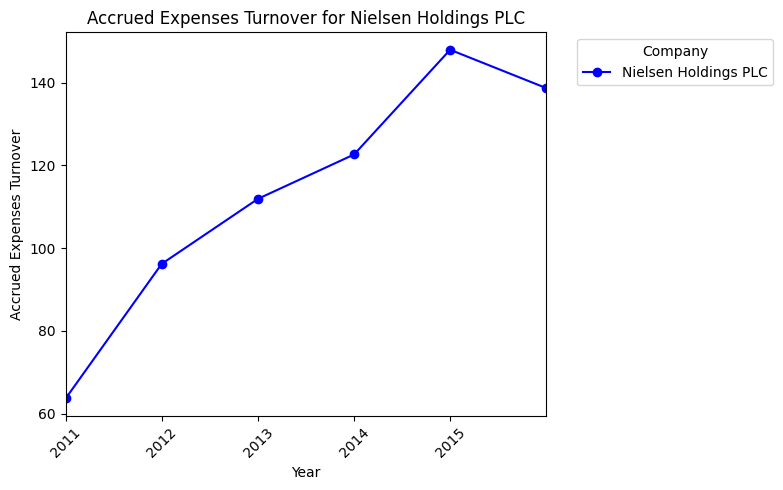

In [51]:
# Setting axis size
min_date = aet_df_2['reportdate'].min()
max_date = aet_df_2['reportdate'].max()

for name in aet_df_2['companyname'].unique():
    company_data = aet_df_2[aet_df_2['companyname'] == name]
    plt.figure(figsize=(8, 5))
    plt.plot(
        company_data['reportdate'],
        company_data['amount'],
        marker='o',
        linestyle='-',
        color='b',
        label=name  # Assign a label for the legend
    )
    plt.xlim(min_date, max_date)
    plt.xticks(rotation=45)
    plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend
    plt.title(f'Accrued Expenses Turnover for {name}')
    plt.xlabel('Year')
    plt.ylabel('Accrued Expenses Turnover')
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()


While some companies show dramatic variances, like UltraPetrol (Bahamas) with a significant spike in 2014, others, like Apple Inc. and Accenture plc, display more stable trends. This visualization allows us to compare and analyze the companies' financial practices and efficiency in managing short-term liabilities during the observed years.

#### Geographical Region Analysis

Understanding the performance of different geographical regions and stock exchanges is crucial in global financial analysis. It allows us to identify which regions are performing well and which may need more attention or investment.

In [52]:
# country averages
country_avg = aet_df_2.groupby('country')['amount'].mean().reset_index()
country_avg = country_avg.sort_values(by='amount', ascending=False)

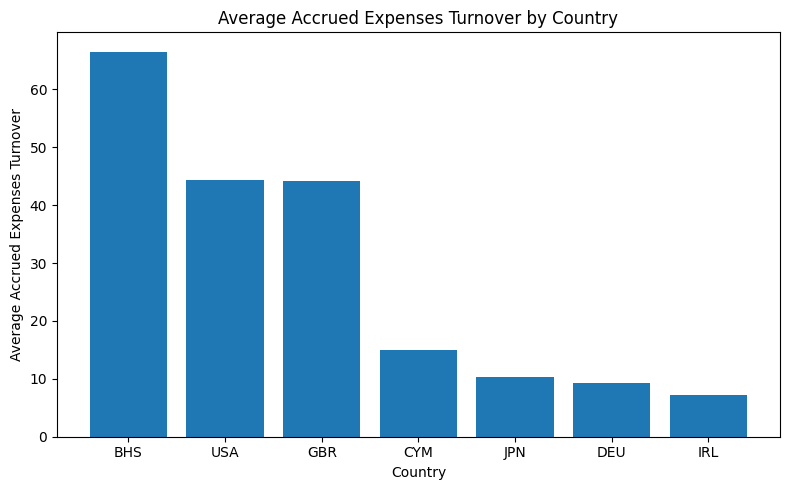

In [54]:
plt.figure(figsize=(8, 5))
plt.bar(country_avg['country'], country_avg['amount'])
plt.xlabel('Country')
plt.ylabel('Average Accrued Expenses Turnover')
plt.title('Average Accrued Expenses Turnover by Country')
plt.tight_layout()
plt.show()

Bahamas, Unitd States and GBR show the best results. It is important to notice that the USA result is more relevant, because the sample over analysis was considerably bigger.